In [28]:
from cl_model import Cl_distribution
import networkx as nx
import matplotlib.pyplot as plt
import queue
import random
import numpy as np

In [29]:
n = 20
m = 100

<function matplotlib.pyplot.show(*args, **kw)>

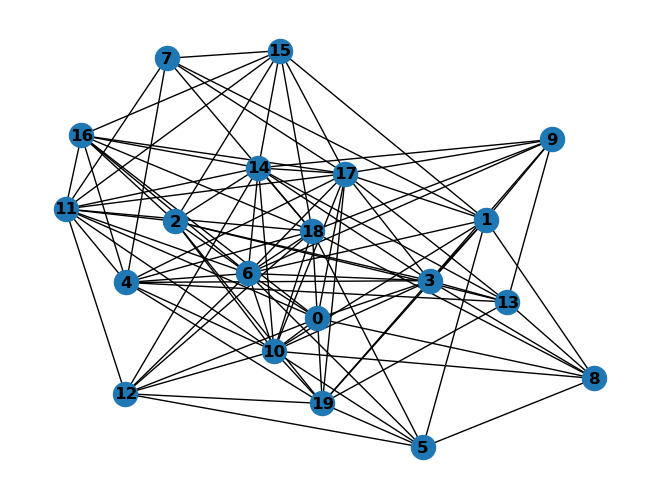

In [30]:
rg = nx.gnm_random_graph(n, m)
nx.draw(rg, with_labels=True, font_weight='bold')
plt.show

In [31]:
# print degree sequence
degree_sequence = list(d for n, d in rg.degree())
print(degree_sequence)
rg.number_of_edges()

[10, 10, 9, 12, 10, 7, 14, 6, 7, 7, 14, 12, 8, 8, 12, 8, 9, 14, 13, 10]


100

In [18]:
cl_helper = Cl_distribution(degree_sequence)
iter = 0
G = nx.Graph()
for i in range (0,n):
    G.add_node(i)
while G.number_of_edges() < m and iter<10000:
    id1 = cl_helper.rvs()
    if G.degree(id1)<degree_sequence[id1]:
        id2 = cl_helper.rvs()
        #while id2==id1 or G.degree(id2)>=degree_sequence[id2]:
            #id2 = cl_helper.rvs()
        if id2==id1 or G.degree(id2)>=degree_sequence[id2]:
            continue
        else:
            G.add_edge(id1,id2)
    iter+=1

99

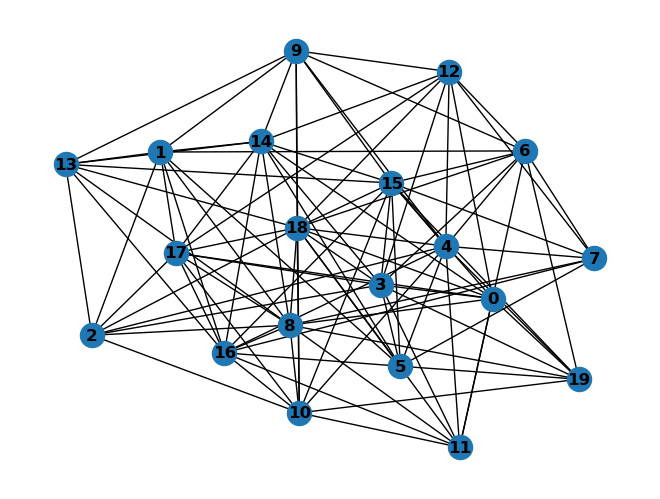

In [19]:
nx.draw(G, with_labels=True, font_weight='bold')
plt.show
G.number_of_edges()

In [47]:
G.number_of_nodes()

20

In [32]:
# pseudo-clustering coefficient
## choose a node at random, choose two of its neighbors at random, and check if they are connected.

def average_clustering(graph, trials=1000):
    triangles = 0
    n = graph.number_of_nodes()
    for i in [int(random.random() * n) for i in range(trials)]:
        # neighbors of i
        nbrs = list(graph.adj[i])
        if len(nbrs) < 2:
            continue
        u, v = random.sample(nbrs, 2)
        if u in graph[v]:
            triangles +=1
    return triangles / float(trials)

In [33]:
moy = 0
for i in range (0,10):
    moy+=average_clustering(rg)
moy/10

0.5831

In [34]:
moy = 0
for i in range (0,10):
    moy+=average_clustering(G)
moy/10

0.513

In [95]:
# PR
pr_rg = list(nx.pagerank(rg, alpha=0.85).values())
pr_rg

[0.06302428579017558,
 0.058334706920023544,
 0.04158718505355478,
 0.040996185070069545,
 0.041598209020422404,
 0.050538175104034716,
 0.03720821794106905,
 0.0451260138653381,
 0.054009415407924206,
 0.05838124541411442,
 0.0496229116257139,
 0.03736535031607307,
 0.04566463922446809,
 0.049907837555878944,
 0.058271383273472734,
 0.05036347994465567,
 0.050537306924332295,
 0.054459816458973534,
 0.05923590957617015,
 0.053767725513535265]

In [96]:
pr_gg = list(nx.pagerank(G, alpha=0.85).values())
pr_gg

[0.05880598991345477,
 0.054509654382116746,
 0.041627876711968444,
 0.0415429416166726,
 0.042086442447626535,
 0.050809720174298925,
 0.03754376047949773,
 0.04607558338457569,
 0.05450393354633559,
 0.05896728175609903,
 0.050636176894893664,
 0.03777428598790946,
 0.04627528415501238,
 0.05004912904687525,
 0.059013496634863015,
 0.05086451669136811,
 0.04998713148247108,
 0.05474417010699517,
 0.059172226200672765,
 0.05501039838629302]

Ajouter des bruits selon laplace distribution

degree sequence:  [13, 12, 8, 8, 8, 10, 7, 9, 11, 12, 10, 7, 9, 10, 12, 10, 10, 11, 12, 11]
[29.262948173087615, 34.13939954261796, -23.183829568272422, -9.278844527768861, 8.956297837962733, 15.07716101290824, 68.72080258849974, 70.36851576499555, -3.4995721258587267, 64.71064346334671, 21.705170762879256, 38.45380922112501, 39.42724270493848, 26.448459865303747, -8.509010638466204, 37.922231890699585, -52.70069692806118, 34.24700520688707, 137.65766794925727, 24.428206343611052]
[22.244819834926187, 10.312982886203118, 10.31501039034955, 8.311872921417084, 8.256841650123343, 7.88540381247515, 9.278812430626907, 8.775831562801063, 11.074394742507346, 11.47581038528818, 8.92570218928987, 4.250021894724072, 9.42584079594542, 8.110935325879602, 12.728771370207774, 12.29875719629029, 9.707207191474353, 14.289529704630462, 14.044995233690202, 16.378449666536028]
[13.028759967223387, 12.241328769010806, 7.893394645482627, 8.135396898384068, 7.911747424163791, 9.951102796626452, 6.9989504081

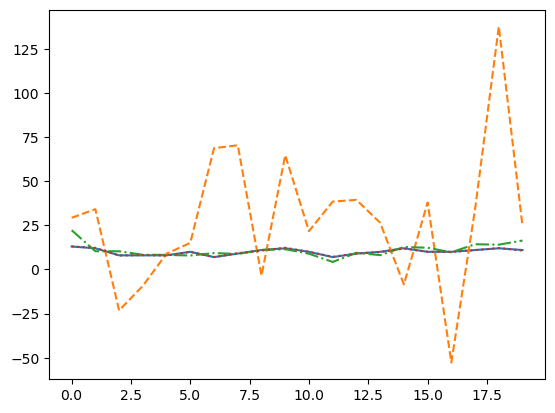

In [98]:
import matplotlib.pyplot as plt
size = len(degree_sequence)
x = list(range(size))
mean = 0
scale = 1
plt.plot(x,degree_sequence)
print("degree sequence: ",degree_sequence)
for epsilon in [0.1,1,10]:
    scale = 2/epsilon
    random_variables = np.random.laplace(mean, scale, size)
    d_laplace = [0]*size
    for i in range (0,len(degree_sequence)):
        d_laplace[i]=degree_sequence[i]+random_variables[i]
    if epsilon == 0.1:
        plt.plot(x,d_laplace,linestyle='--')
    else: 
        if epsilon == 1:
            plt.plot(x,d_laplace,linestyle='-.')
        else:
            plt.plot(x,d_laplace,linestyle=':')
    print(d_laplace)
plt.show()

In [117]:
def degree_sequence_laplace(degree_sequence,epsilon):
    mean = 0
    scale = 2/epsilon
    size = len(degree_sequence)
    random_variables = np.random.laplace(mean, scale, size)
    list = [0]*size
    for i in range(size):
        list[i] = round(degree_sequence[i]+random_variables[i])
    print("degree sequence with laplace: ",list)
    return list

In [148]:
def calcul_mkj(degree_sequence_noisy,i,j):
        sum = 0
        for k in range (i,j+1):
            sum += (degree_sequence_noisy[k]/(j-i+1))
        return sum

def degree_sequence_contrainte(degree_sequence,epsilon):
    size = len(degree_sequence)
    # sort degree sequence
    print("degree sequence: ",degree_sequence)
    original_order = [(degree_sequence[i], i) for i in range(size)]
    print(original_order)
    original_order.sort()
    sorted_list=[]
    orders = []
    for element in original_order:
        sorted_list.append(element[0])
        orders.append(element[1])
    print("orders: ",orders)
    #print("degree sequence increasing: ",sorted_list)

    mean = 0
    scale = 2/epsilon
    
    random_variables = np.random.laplace(mean, scale, size)
    degree_sequence_noisy = [0]*size
    for i in range (size):
        degree_sequence_noisy[i] = sorted_list[i] + random_variables[i]

    degree_sequence_contrainte = [0]*size
    m_k = [0]*size
    for k in reversed(range(size)):
        candidate_list = []
        for j in range (k,size):
            m_kj = calcul_mkj(degree_sequence_noisy,k,j)
            candidate_list.append(m_kj)
        m_k[k] = min(candidate_list)

    for i in range(size):
        degree_sequence_contrainte[i] = round(max(m_k[:i+1]))
    print(degree_sequence_contrainte)
    shuffled_degree_sequence_constrainte = [0]*size
    for i in range(len(orders)):
        shuffled_degree_sequence_constrainte[orders[i]] = degree_sequence_contrainte[i]
    print("degree sequence constrained: ",shuffled_degree_sequence_constrainte)
    return shuffled_degree_sequence_constrainte


In [149]:
degree_sequence = [1,1,1,1,1]
degree_sequence_contrainte(degree_sequence,1)

degree sequence:  [1, 1, 1, 1, 1]
[(1, 0), (1, 1), (1, 2), (1, 3), (1, 4)]
orders:  [0, 1, 2, 3, 4]
[2, 2, 2, 2, 2]
degree sequence constrained:  [2, 2, 2, 2, 2]


[2, 2, 2, 2, 2]

In [124]:
def mse (list1,list2):
    size = len(list1)
    mse = 0
    for i in range (size):
        mse+=(list1[i]-list2[i])*(list1[i]-list2[i])/list1[i]
    return mse/size
degree_sequence_sorted = [0]*len(degree_sequence)
for i in range (len(degree_sequence)):
    degree_sequence_sorted[i]=degree_sequence[i]
degree_sequence_sorted.sort()
for epsilon in [0.1,1,10]:
    print("degree sequence: ",degree_sequence)
    ds_laplace = degree_sequence_laplace(degree_sequence,epsilon)
    ds_contrainte = degree_sequence_contrainte(degree_sequence,epsilon)
    print("mse avant: ",mse(degree_sequence,ds_laplace))
    print("mse après: ",mse(degree_sequence_sorted,ds_contrainte))


degree sequence:  [13, 12, 8, 8, 8, 10, 7, 9, 11, 12, 10, 7, 9, 10, 12, 10, 10, 11, 12, 11]
degree sequence with laplace:  [13, 17, -22, 12, 5, 31, 23, 23, -26, 28, 14, -84, -1, 16, 25, 18, -38, -7, 19, -5]
degree sequence constrained:  [6, 8, 8, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 16]
mse avant:  93.64752344877346
mse après:  0.12834554334554332
degree sequence:  [13, 12, 8, 8, 8, 10, 7, 9, 11, 12, 10, 7, 9, 10, 12, 10, 10, 11, 12, 11]
degree sequence with laplace:  [8, 12, 12, 10, 11, 10, 5, 10, 10, 13, 11, 6, 12, 6, 12, 14, 3, 11, 13, 11]
degree sequence constrained:  [4, 6, 6, 6, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 14, 14]
mse avant:  0.7915524753024753
mse après:  0.24168886668886666
degree sequence:  [13, 12, 8, 8, 8, 10, 7, 9, 11, 12, 10, 7, 9, 10, 12, 10, 10, 11, 12, 11]
degree sequence with laplace:  [13, 12, 8, 8, 8, 10, 7, 9, 11, 12, 11, 7, 9, 10, 12, 10, 10, 11, 12, 11]
degree sequence constrained:  [1, 7, 8, 8, 10, 10, 11, 11

In [145]:
original_list = [1,3,3,2,1,2]
original_order = [(original_list[i], i) for i in range(len(original_list))]
sorted_list = sorted(original_order)
orders = []
print(sorted_list)
for element in sorted_list:
    orders.append(element[1])
print(orders)

[(1, 0), (1, 4), (2, 3), (2, 5), (3, 1), (3, 2)]
[0, 4, 3, 5, 1, 2]


In [70]:
def load_graph_edges(n,filename):
    graph = nx.Graph()
    for i in range (0,4039):
        graph.add_node(i)
    with open(filename) as f:
        for line in f:
            values = line.split()
            node_i = int(values[0])
            node_j = int(values[1])
            graph.add_edge(node_i,node_j)
    return graph

In [71]:
graph = load_graph_edges(4039,"facebook_combined.txt")

In [72]:
graph.number_of_nodes()

4039

KeyboardInterrupt: 

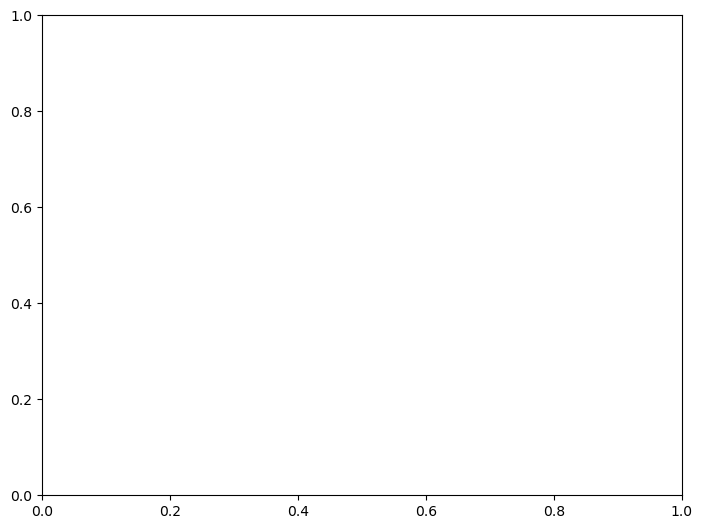

In [63]:
nx.draw(graph, with_labels=True, font_weight='bold')
plt.show

In [64]:
graph.number_of_edges()

88234

In [66]:
cc = average_clustering(graph)
cc

0.598